In [1]:
%load_ext autoreload
%autoreload 2

### Load Example Series

In [2]:
from functions import Tarloader

# Make Dataloader
tl = Tarloader('./data/hc-11/data/')
# Show available files
print(tl.files)
# Extract session 0 (Will extract files if required)
print(f'tl contains {len(tl)} sessions')
dl = tl['Buddy_06272013']  # Equivalent to tl[2]
# Parse group 1
print(f'dl contains {len(dl)} groups')
novel, data = dl[0]

['Achilles_10252013', 'Achilles_11012013', 'Buddy_06272013', 'Cicero_09012014', 'Cicero_09102014', 'Cicero_09172014', 'Gatsby_08022013', 'Gatsby_08282013']
tl contains 8 sessions
dl contains 16 groups


### Process Data

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm

# Params
subsample = 10

# Create df
df = pd.DataFrame(columns=['time', 'feature', 'position'])

# Process rows
for _, row in data.iloc[::subsample].iterrows():
    time = row['time']
    feature = row['feature0']
    # Get index of closest time
    timestamps = novel['sessInfo']['Position']['TimeStamps']
    idx = np.argmin(np.abs(timestamps - time))
    position = novel['sessInfo']['Position']['OneDLocation'][idx]

    # Append to df
    df.loc[df.shape[0]] = [time, feature, position]

### Plot Series

C:\Users\nck\AppData\Local\Temp\ipykernel_23312\2376372930.py:8: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs['A'].get_shared_x_axes().join(axs['A'], axs['B'])
C:\Users\nck\AppData\Local\Temp\ipykernel_23312\2376372930.py:9: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs['C'].get_shared_x_axes().join(axs['C'], axs['D'])


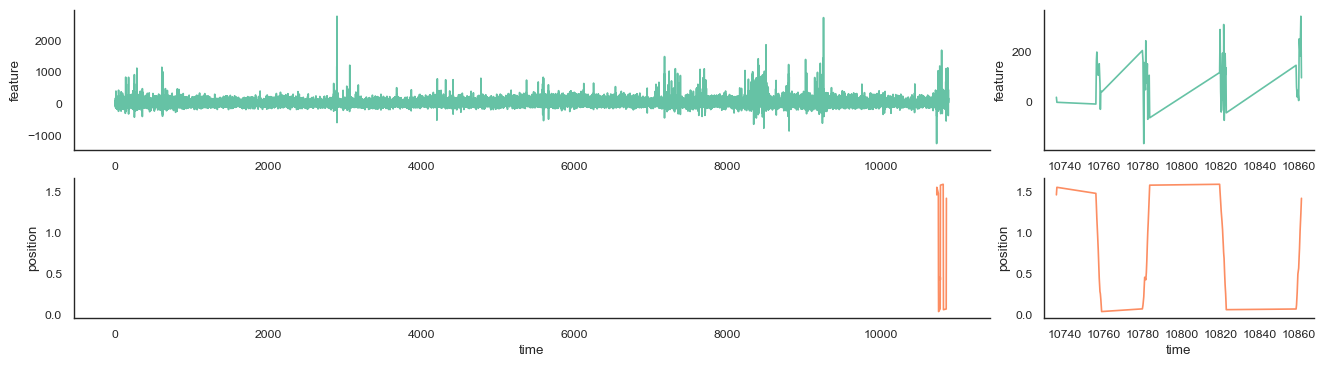

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='white', palette='Set2')

# Plot subsampled series
fig = plt.figure(figsize=(16, 4))
axs = fig.subplot_mosaic('AAAD;BBBC')
axs['A'].get_shared_x_axes().join(axs['A'], axs['B'])
axs['C'].get_shared_x_axes().join(axs['C'], axs['D'])
sns.lineplot(data=df, x='time', y='feature', ax=axs['A'])
sns.despine(ax=axs['A'])
axs['A'].set_xlabel(None)
sns.lineplot(data=df.loc[~pd.isna(df['position'])], x='time', y='feature', ax=axs['D'])
sns.despine(ax=axs['D'])
axs['D'].set_xlabel(None)
sns.lineplot(data=df, x='time', y='position', color=sns.color_palette()[1], ax=axs['B'])
sns.despine(ax=axs['B'])
sns.lineplot(data=df.loc[~pd.isna(df['position'])], x='time', y='position', color=sns.color_palette()[1], ax=axs['C'])
sns.despine(ax=axs['C'])